In [2]:
"""
Created on Fri Nov 27 16:00:47 2020
@author: hien
"""
from __future__ import division

import logging
from src.environment import Environment
from read_input import Data
from src.model import Policy
from src.Coach import Coach
from src.utils import dotdict
import torch


2021-10-27 23:25:32.717837: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-27 23:25:32.717869: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:

log = logging.getLogger(__name__)

args = dotdict({
    'run_mode': 'train',
    'visualize': True,
    'min_size': 8,
    'max_size': 10,
    'n_games': 1,
    'n_maps': 1000,
    'show_screen': False,
    'replay_memory_size': 10000,
    'initial_epsilon': 0.1,
    'final_epsilon': 1e-4,
    'dir': './Models/',
    'numIters': 1000,
    'numEps': 20,              # Number of complete self-play games to simulate during a new iteration.
    'tempThreshold': 15,        #
    'updateThreshold': 0.6,     # During arena playoff, new neural net will be accepted if threshold or more of games are won.
    'maxlenOfQueue': 10000,    # Number of game examples to train the neural networks.
    'numMCTSSims': 22,          # Number of games moves for MCTS to simulate.
    'arenaCompare': 40,         # Number of games to play during arena play to determine if new net will be accepted.
    'cpuct': 1,
    'colab_train': False,
    'colab_dir': "/content/drive/MyDrive/trainned_model/agent_mcts.pt",
    'checkpoint': './temp/',
    'load_model': False,
    'load_folder_file': ('Models','agent_mcts.pt'),
    'numItersForTrainExamplesHistory': 15,
    'saved_model': True
})


In [4]:
data = Data(args.min_size, args.max_size)
env = Environment(data.get_random_map(), args.show_screen, args.max_size)
model = Policy(env)
if args.load_model:
    log.info('Loading checkpoint "%s/%s"...', args.load_folder_file)
    model.load_checkpoint(args.load_folder_file[0], args.load_folder_file[1])
else:
    log.warning('Not loading a checkpoint!')


Not loading a checkpoint!


Self Play: 100%|████████████████████████████████| 20/20 [13:00<00:00, 39.01s/it]

deque([192.0, 211.0, 219.66666666666666, 207.75, 208.2, 210.0, 208.71428571428572, 200.125, 196.66666666666666, 193.3, 200.0, 195.16666666666666, 191.6153846153846, 186.64285714285714, 188.4, 188.1875, 185.23529411764707, 186.77777777777777, 184.6315789473684, 182.8], maxlen=10000)
deque([216.0, 172.0, 143.66666666666666, 172.0, 179.8, 193.16666666666666, 193.14285714285714, 200.0, 198.33333333333334, 205.7, 200.36363636363637, 196.91666666666666, 195.92307692307693, 191.21428571428572, 189.2, 190.3125, 189.23529411764707, 186.61111111111111, 185.47368421052633, 181.4], maxlen=10000)


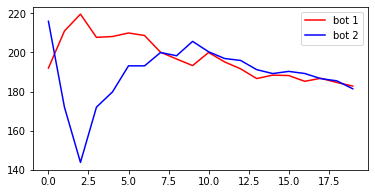

Training Net: 100%|█| 4/4 [00:16<00:00,  4.24s/it, Loss_pi=2.91e+01, Loss_v=3.54
Training Net: 100%|█| 4/4 [00:16<00:00,  4.12s/it, Loss_pi=1.57e+01, Loss_v=1.77
Training Net: 100%|█| 4/4 [00:16<00:00,  4.05s/it, Loss_pi=1.11e+01, Loss_v=1.18
Training Net: 100%|█| 4/4 [00:16<00:00,  4.19s/it, Loss_pi=8.89e+00, Loss_v=8.86
Training Net: 100%|█| 4/4 [00:16<00:00,  4.06s/it, Loss_pi=7.54e+00, Loss_v=7.09
Training Net: 100%|█| 4/4 [00:16<00:00,  4.19s/it, Loss_pi=6.64e+00, Loss_v=5.91
Training Net: 100%|█| 4/4 [00:17<00:00,  4.25s/it, Loss_pi=5.99e+00, Loss_v=5.07
Training Net: 100%|█| 4/4 [00:16<00:00,  4.23s/it, Loss_pi=5.51e+00, Loss_v=4.44
Training Net: 100%|█| 4/4 [00:17<00:00,  4.33s/it, Loss_pi=5.14e+00, Loss_v=3.94
Training Net: 100%|█| 4/4 [00:16<00:00,  4.11s/it, Loss_pi=4.84e+00, Loss_v=3.55
Training Net: 100%|█| 4/4 [00:16<00:00,  4.13s/it, Loss_pi=4.59e+00, Loss_v=3.23
Training Net: 100%|█| 4/4 [00:16<00:00,  4.16s/it, Loss_pi=4.39e+00, Loss_v=2.96
Training Net: 100%|█| 4/4 [0

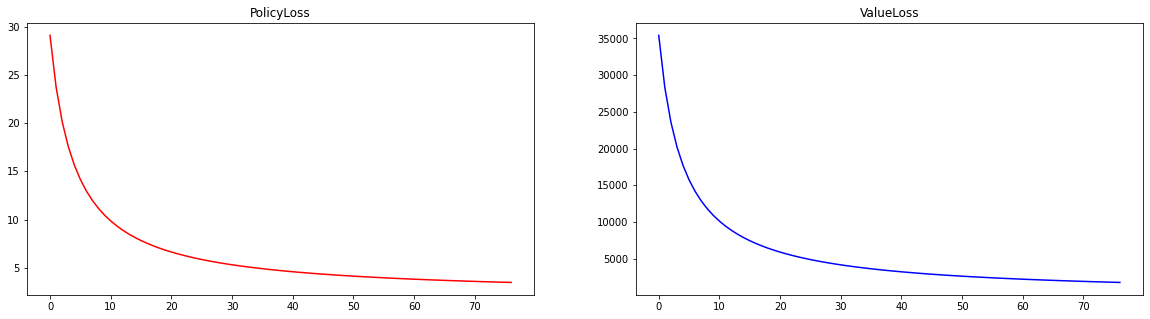

Checkpoint Directory exists! 


Self Play:  25%|████████                        | 5/20 [16:02<48:08, 192.60s/it]


KeyboardInterrupt: 

In [5]:
# log.info('Loading the Coach...')
coach = Coach(env, model, args)

# if args.load_model:
#     # log.info("Loading 'trainExamples' from file...")
#     coach.loadTrainExamples()

# log.info('Starting the learning process !')
for i in range(args.numIters):
    # bookkeeping
    log.info(f'Starting Iter #{i} ...')
    coach.learn(i)
    coach.game = Environment(data.get_random_map(), args.show_screen, args.max_size)
